In [1]:
import refexps
from os import listdir, path
from itertools import combinations
from collections import defaultdict
import numpy as np
import nltk
from scipy import stats
import compound_splitter

In [2]:
def compute_values_move(refexps_dir, success_dir, compound = True):
    splits = compound_splitter.load_dict('de_lower.dict')
    move_level_data = defaultdict(dict)
    move_level_align = []
    move_level_coherence = []
    success_types = set()
    playermove_level_align_speaker = defaultdict(list)
    playermove_level_coherence_speaker= defaultdict(list)

    for dialogue in listdir(refexps_dir):
        #extract dialogue type
        success_file = dialogue.replace('refexps', 'movesuccess')
        success_file = path.join(success_dir, success_file)
        if dialogue.startswith('FTT'):
            language = 'german'
        else:
            language = 'english'
        dialogue = path.join(refexps_dir, dialogue)
        #load referring expressions data
        dialogue = refexps.load_data(dialogue)
        success_moves = refexps.load_data(success_file)
        #move level
        dialogue_move = refexps.move_level(dialogue)
        #iterate over moves
        for move in dialogue_move:
            refs = move[1]
            #iterate over objects
            for obj in refs:
                #iterate over objects
                refobj = refs[obj]
                #SIMILARITY OF LEXICAL CONTENT INTO
                sim_align = []
                sim_align_speaker = defaultdict(list)
                sim_coherence_speaker = defaultdict(list)
                sim_coherence = []
                for ref in refobj:
                    speaker = ref[1]
                    sim = refexps.lex_sim(ref, refexps.get_previous(ref, refobj), language, splits, compound)
                    if sim != 'undefined':
                        sim_align.append(sim)
                        sim_align_speaker[speaker].append(sim)
                sim_align = np.mean(sim_align)
                comb_ref = combinations(refobj,2)
                for comb in comb_ref:
                    if comb[0] != comb[1]:
                        sim = refexps.lex_sim(comb[0], comb[1], language, splits, compound)
                        if sim != 'undefined':
                            sim_coherence.append(sim)
                            sim_coherence_speaker[comb[0][1]].append(sim)
                            sim_coherence_speaker[comb[1][1]].append(sim)
                sim_coherence = np.mean(sim_coherence)
                #movelevel coherence and alignment (for each object)
                if not np.isnan(sim_coherence):
                    move_level_coherence.append(sim_coherence)
                if not np.isnan(sim_align):
                    move_level_align.append(sim_align)
                for s in sim_align_speaker:
                    if not np.isnan(np.mean(sim_align_speaker[s])):
                        playermove_level_align_speaker[s].append(np.mean(sim_align_speaker[s]))
                for s in sim_coherence_speaker:
                    if not np.isnan(np.mean(sim_coherence_speaker[s])) :
                        playermove_level_coherence_speaker[s].append(np.mean(sim_coherence_speaker[s]))
            values = [sim_coherence, sim_align, sim_align_speaker['e-utts'], sim_align_speaker['p-utts'], sim_coherence_speaker['e-utts'], sim_coherence_speaker['p-utts'] ]
            move_level_data[move[0]]['values'] = values
            success = success_moves[move[0]]
            move_level_data[move[0]]['success'] = success
    move_level_align_all = []
    move_level_coherence_all = []

    playermove_level_align_speaker_all = defaultdict(list)
    playermove_level_coherence_speaker_all = defaultdict(list)

    results_move = defaultdict(list)
    
    playermove_level_coherence = []
    for s in playermove_level_coherence_speaker:
        playermove_level_coherence += playermove_level_coherence_speaker[s]
        playermove_level_coherence_speaker_all[s] += playermove_level_coherence_speaker[s]
        results_move['Move coherence '+ s] = playermove_level_coherence_speaker[s]
    results_move['Move players coherence'] = playermove_level_coherence
    results_move['Move coherence'] = move_level_coherence

    playermove_level_align = []
    for s in playermove_level_align_speaker:
        playermove_level_align += playermove_level_align_speaker[s]
        playermove_level_align_speaker_all[s] += playermove_level_align_speaker[s]
        results_move['Move alignment '+ s] = playermove_level_align_speaker[s]
    results_move['Move players alignment'] = playermove_level_align
    results_move['Move alignment'] = move_level_align

    for value in results_move:
        dataset = results_move[value]
        print '\t'+ value + ': '
        print '\tMean: '+ str(np.mean(dataset)) +'\tStandard deviation: '+ str(np.std(dataset))
        print '\tMax value: ' + str(max(dataset)) + '\tMin value: '+ str(min(dataset))
    return results_move

In [3]:
de_dataset_dir = 'En_De_Dataset/De/RefExp'
de_success_dir = 'En_De_Dataset/De/Success'

en_dataset_dir = 'En_De_Dataset/En/RefExp'
en_success_dir = 'En_De_Dataset/En/Success'

all_dataset_dir = 'En_De_Dataset/All/RefExp'
all_success_dir = 'En_De_Dataset/All/Success'

results_de = compute_values_move(de_dataset_dir, de_success_dir)
print '\n\n'
results_en = compute_values_move(en_dataset_dir, en_success_dir)
print '\n\n'
results_all = compute_values_move(all_dataset_dir, all_success_dir)

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


	Move coherence: 
	Mean: 0.188896380461	Standard deviation: 0.287182912161
	Max value: 1.0	Min value: 0.0
	Move alignment e-utts: 
	Mean: 0.0783389198412	Standard deviation: 0.223947435992
	Max value: 1.0	Min value: 0.0
	Move alignment p-utts: 
	Mean: 0.0127828569427	Standard deviation: 0.0914058853529
	Max value: 1.0	Min value: 0.0
	Move players coherence: 
	Mean: 0.173983654506	Standard deviation: 0.282315728989
	Max value: 1.0	Min value: 0.0
	Move players alignment: 
	Mean: 0.0333440412273	Standard deviation: 0.149631685608
	Max value: 1.0	Min value: 0.0
	Move coherence p-utts: 
	Mean: 0.178262116651	Standard deviation: 0.279717995455
	Max value: 1.0	Min value: 0.0
	Move coherence e-utts: 
	Mean: 0.166282422645	Standard deviation: 0.286771576991
	Max value: 1.0	Min value: 0.0
	Move alignment: 
	Mean: 0.0191384745641	Standard deviation: 0.0830978312196
	Max value: 0.666666666667	Min value: 0.0



	Move coherence: 
	Mean: 0.182823534546	Standard deviation: 0.246655762255
	Max value: 1

Move coherence
369
181
Move alignment e-utts
223
117
Move alignment p-utts
488
224
Move players coherence
546
277
Move players alignment
711
341
Move coherence p-utts
351
165
Move coherence e-utts
195
112
Move alignment
538
263
DE: mean 0.0333440412273  SD 0.149631685608
EN: mean 0.0450012800819  SD 0.156579348053


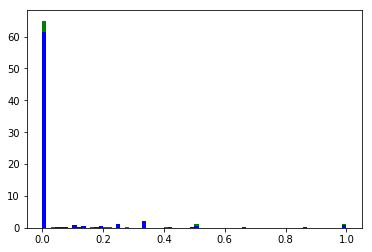

In [7]:
for val in results_de:
    print val
    print len(results_de[val])
    print len(results_en[val])

move_coh_de = results_de['Move players alignment']
move_coh_en = results_en['Move players alignment']

import matplotlib.pyplot as plt
%matplotlib inline

print 'DE: mean', np.mean(move_coh_de), ' SD', np.var(move_coh_de)**0.5
print 'EN: mean', np.mean(move_coh_en), ' SD', np.var(move_coh_en)**0.5

plt.hist(move_coh_de, bins=70, facecolor='green', normed=1)
plt.hist(move_coh_en, bins=70, facecolor='blue', normed=1)

plt.show()

In [4]:
print 'Differences between languages'
for var in results_all:
    ttest =  stats.ttest_ind(results_de[var],results_en[var], equal_var = False)
    if ttest[1] < 0.05:
        print var
        print str(ttest)+'\tSignificantly different'
print '\n'

print 'Differences between players'
ttest =  stats.ttest_ind(results_de['Move alignment e-utts'],results_de['Move alignment p-utts'])
if ttest[1] < 0.05:
    print 'Players move alignment de'
    print str(ttest)+'\tSignificantly different'

ttest =  stats.ttest_ind(results_en['Move alignment e-utts'],results_en['Move alignment p-utts'])
if ttest[1] < 0.05:
    print 'Players move alignment en'
    print str(ttest)+'\tSignificantly different'
                                                                        
ttest =  stats.ttest_ind(results_all['Move alignment e-utts'],results_all['Move alignment p-utts'])
if ttest[1] < 0.05:
    print 'Players move alignment all'
    print str(ttest)+'\tSignificantly different'                                                             
                                                                        
ttest =  stats.ttest_ind(results_de['Move coherence e-utts'],results_de['Move coherence p-utts'])
if ttest[1] < 0.05:
    print 'Players move coherence de'
    print str(ttest)+'\tSignificantly different'

ttest =  stats.ttest_ind(results_en['Move coherence e-utts'],results_en['Move coherence p-utts'])
if ttest[1] < 0.05:
    print 'Players move coherence en'
    print str(ttest)+'\tSignificantly different'
                                                                        
ttest =  stats.ttest_ind(results_all['Move coherence e-utts'],results_all['Move coherence p-utts'])
if ttest[1] < 0.05:
    print 'Players move coherence all'
    print str(ttest)+'\tSignificantly different' 

Differences between languages


Differences between players
Players move alignment de
Ttest_indResult(statistic=5.5280046765457183, pvalue=4.5547932027491192e-08)	Significantly different
Players move alignment en
Ttest_indResult(statistic=4.2271813072207252, pvalue=3.046671089348943e-05)	Significantly different
Players move alignment all
Ttest_indResult(statistic=6.996289370103506, pvalue=4.6750520364509257e-12)	Significantly different


In [5]:


results_de = compute_values_move(de_dataset_dir, de_success_dir, compound = False)
print '\n\n'
results_en = compute_values_move(en_dataset_dir, en_success_dir, compound = False)
print '\n\n'
results_all = compute_values_move(all_dataset_dir, all_success_dir, compound = False)

	Move coherence: 
	Mean: 0.180577189882	Standard deviation: 0.278720226827
	Max value: 1.0	Min value: 0.0
	Move alignment e-utts: 
	Mean: 0.0805810723075	Standard deviation: 0.230563136547
	Max value: 1.0	Min value: 0.0
	Move alignment p-utts: 
	Mean: 0.0127828569427	Standard deviation: 0.0914058853529
	Max value: 1.0	Min value: 0.0
	Move players coherence: 
	Mean: 0.16754931983	Standard deviation: 0.275478122893
	Max value: 1.0	Min value: 0.0
	Move players alignment: 
	Mean: 0.0340472761078	Standard deviation: 0.152961111834
	Max value: 1.0	Min value: 0.0
	Move coherence p-utts: 
	Mean: 0.168751579529	Standard deviation: 0.269777963861
	Max value: 1.0	Min value: 0.0
	Move coherence e-utts: 
	Mean: 0.165385252373	Standard deviation: 0.285438951035
	Max value: 1.0	Min value: 0.0
	Move alignment: 
	Mean: 0.0193708165716	Standard deviation: 0.0835669221653
	Max value: 0.666666666667	Min value: 0.0



	Move coherence: 
	Mean: 0.182823534546	Standard deviation: 0.246655762255
	Max value: 1.

In [6]:
print 'Differences between languages'
for var in results_all:
    ttest =  stats.ttest_ind(results_de[var],results_en[var], equal_var = False)
    if ttest[1] < 0.05:
        print var
        print str(ttest)+'\tSignificantly different'
print '\n'

print 'Differences between players'
ttest =  stats.ttest_ind(results_de['Move alignment e-utts'],results_de['Move alignment p-utts'])
if ttest[1] < 0.05:
    print 'Players move alignment de'
    print str(ttest)+'\tSignificantly different'

ttest =  stats.ttest_ind(results_en['Move alignment e-utts'],results_en['Move alignment p-utts'])
if ttest[1] < 0.05:
    print 'Players move alignment en'
    print str(ttest)+'\tSignificantly different'
                                                                        
ttest =  stats.ttest_ind(results_all['Move alignment e-utts'],results_all['Move alignment p-utts'])
if ttest[1] < 0.05:
    print 'Players move alignment all'
    print str(ttest)+'\tSignificantly different'                                                             
                                                                        
ttest =  stats.ttest_ind(results_de['Move coherence e-utts'],results_de['Move coherence p-utts'])
if ttest[1] < 0.05:
    print 'Players move coherence de'
    print str(ttest)+'\tSignificantly different'

ttest =  stats.ttest_ind(results_en['Move coherence e-utts'],results_en['Move coherence p-utts'])
if ttest[1] < 0.05:
    print 'Players move coherence en'
    print str(ttest)+'\tSignificantly different'
                                                                        
ttest =  stats.ttest_ind(results_all['Move coherence e-utts'],results_all['Move coherence p-utts'])
if ttest[1] < 0.05:
    print 'Players move coherence all'
    print str(ttest)+'\tSignificantly different' 

Differences between languages


Differences between players
Players move alignment de
Ttest_indResult(statistic=5.5954699824351932, pvalue=3.1446382910675488e-08)	Significantly different
Players move alignment en
Ttest_indResult(statistic=4.2271813072207252, pvalue=3.046671089348943e-05)	Significantly different
Players move alignment all
Ttest_indResult(statistic=7.0460191846011142, pvalue=3.3275412997820812e-12)	Significantly different


In [7]:
def compute_values_game(refexps_dir, success_dir, compound = True):
    splits = compound_splitter.load_dict('de_lower.dict')
    game_level_align = []
    game_level_coherence = []
    playergame_level_align_speaker = defaultdict(list)
    playergame_level_coherence_speaker = defaultdict(list)

    for dialogue in listdir(refexps_dir):
        if dialogue.startswith('FTT'):
            language = 'german'
        else:
            language = 'english'
        dialogue = refexps.load_data(path.join(refexps_dir, dialogue))
        dialogue_game = refexps.gamerun_level(dialogue)
        for obj in dialogue_game:
            refobj = dialogue_game[obj]
            sim_align = []
            sim_align_speaker = defaultdict(list)
            sim_coherence_speaker = defaultdict(list)
            sim_coherence = []
            for ref in refobj:
                speaker = ref[1]
                sim = refexps.lex_sim(ref, refexps.get_previous(ref, refobj), language, splits, compound)
                if sim != 'undefined':
                    sim_align.append(sim)
                    sim_align_speaker[speaker].append(sim)
            sim_align = np.mean(sim_align)
            for s in sim_align_speaker[speaker]:
                sim_align_speaker[speaker] = np.mean(sim_align_speaker[speaker])
            comb_ref = combinations(refobj,2)
            for comb in comb_ref:
                if comb[0] != comb[1]:
                    sim = refexps.lex_sim(comb[0], comb[1], language, splits, compound)
                    if sim != 'undefined':
                        sim_coherence.append(sim)
                        sim_coherence_speaker[comb[0][1]].append(sim)
                        sim_coherence_speaker[comb[1][1]].append(sim)
            sim_coherence = np.mean(sim_coherence)
            #gamelevel coherence and alignment (for each object)
            if not np.isnan(sim_coherence) :
                game_level_coherence.append(sim_coherence)
            if not np.isnan(sim_align):
                game_level_align.append(sim_align)
            for s in sim_align_speaker:
                if not np.isnan(np.mean(sim_align_speaker[s])):
                    playergame_level_align_speaker[s].append(np.mean(sim_align_speaker[s]))
            for s in sim_coherence_speaker:
                if not np.isnan(np.mean(sim_coherence_speaker[s])) :
                    playergame_level_coherence_speaker[s].append(np.mean(sim_coherence_speaker[s]))

    game_level_align_all = []
    game_level_coherence_all = []

    playergame_level_align_speaker_all = defaultdict(list)
    playergame_level_coherence_speaker_all = defaultdict(list)

    results_game = defaultdict(list)

    playergame_level_coherence = []
    for s in playergame_level_coherence_speaker:
        playergame_level_coherence += playergame_level_coherence_speaker[s]
        playergame_level_coherence_speaker_all[s] += playergame_level_coherence_speaker[s]
        results_game['game coherence '+ s] = playergame_level_coherence_speaker[s]
    results_game['game players coherence'] = playergame_level_coherence
    results_game['game coherence'] = game_level_coherence
    playergame_level_align = []
    for s in playergame_level_align_speaker:
        playergame_level_align += playergame_level_align_speaker[s]
        playergame_level_align_speaker_all[s] += playergame_level_align_speaker[s]
        results_game['game alignment '+ s] = playergame_level_align_speaker[s]
    results_game['game players alignment'] = playergame_level_align
    results_game['game alignment'] = game_level_align
    for value in results_game:
        dataset = results_game[value]
        print '\t'+ value + ': '
        print '\tMean: '+ str(np.mean(dataset)) +'\tStandard deviation: '+ str(np.std(dataset))
        print '\tMax value: ' + str(max(dataset)) + '\tMin value: '+ str(min(dataset))
    return results_game

In [8]:

results_de = compute_values_game(de_dataset_dir, de_success_dir)
print '\n\n'
results_en = compute_values_game(en_dataset_dir, en_success_dir)
print '\n\n'
results_all = compute_values_game(all_dataset_dir, all_success_dir)

	game players coherence: 
	Mean: 0.111700272806	Standard deviation: 0.173066823379
	Max value: 1.0	Min value: 0.0
	game coherence e-utts: 
	Mean: 0.113244535277	Standard deviation: 0.172929050429
	Max value: 1.0	Min value: 0.0
	game alignment: 
	Mean: 0.0193176036799	Standard deviation: 0.0696030133704
	Max value: 0.533333333333	Min value: 0.0
	game alignment p-utts: 
	Mean: 0.0106359878023	Standard deviation: 0.0496096345117
	Max value: 0.5	Min value: 0.0
	game coherence p-utts: 
	Mean: 0.110818877717	Standard deviation: 0.173139234795
	Max value: 1.0	Min value: 0.0
	game players alignment: 
	Mean: 0.0337033816161	Standard deviation: 0.128962167906
	Max value: 1.0	Min value: 0.0
	game coherence: 
	Mean: 0.114203590182	Standard deviation: 0.175171250337
	Max value: 1.0	Min value: 0.0
	game alignment e-utts: 
	Mean: 0.08114036083	Standard deviation: 0.205977917528
	Max value: 1.0	Min value: 0.0



	game players coherence: 
	Mean: 0.143861468595	Standard deviation: 0.196350067651
	Max va

In [9]:
print 'Differences between languages'
for var in results_all:
    ttest =  stats.ttest_ind(results_de[var],results_en[var], equal_var = False)
    if ttest[1] < 0.05:
        print var
        print str(ttest)+'\tSignificantly different'
print '\n'

print 'Differences between players'
ttest =  stats.ttest_ind(results_de['game alignment e-utts'],results_de['game alignment p-utts'], equal_var = False)
if ttest[1] < 0.05:
    print 'Players game alignment de'
    print str(ttest)+'\tSignificantly different'

ttest =  stats.ttest_ind(results_en['game alignment e-utts'],results_en['game alignment p-utts'], equal_var = False)
if ttest[1] < 0.05:
    print 'Players game alignment en'
    print str(ttest)+'\tSignificantly different'
                                                                        
ttest =  stats.ttest_ind(results_all['game alignment e-utts'],results_all['game alignment p-utts'], equal_var = False)
if ttest[1] < 0.05:
    print 'Players game alignment all'
    print str(ttest)+'\tSignificantly different'                                                               
                                                                        
ttest =  stats.ttest_ind(results_de['game coherence e-utts'],results_de['game coherence p-utts'], equal_var = False)
if ttest[1] < 0.05:
    print 'Players game coherence de'
    print str(ttest)+'\tSignificantly different'

ttest =  stats.ttest_ind(results_en['game coherence e-utts'],results_en['game coherence p-utts'], equal_var = False)
if ttest[1] < 0.05:
    print 'Players game coherence en'
    print str(ttest)+'\tSignificantly different'
                                                                        
ttest =  stats.ttest_ind(results_all['game coherence e-utts'],results_all['game coherence p-utts'], equal_var = False)
if ttest[1] < 0.05:
    print 'Players game coherence all'
    print str(ttest)+'\tSignificantly different' 

Differences between languages
game players coherence
Ttest_indResult(statistic=-1.9972011954513069, pvalue=0.046407019391961346)	Significantly different
game coherence p-utts
Ttest_indResult(statistic=-2.2784842014077693, pvalue=0.023540285275888632)	Significantly different
game coherence
Ttest_indResult(statistic=-2.3441139314897388, pvalue=0.019801822373430682)	Significantly different


Differences between players
Players game alignment de
Ttest_indResult(statistic=3.7439689495291772, pvalue=0.00027098839761274102)	Significantly different
Players game alignment en
Ttest_indResult(statistic=3.5497926304219951, pvalue=0.00058281307451336743)	Significantly different
Players game alignment all
Ttest_indResult(statistic=5.2065605383549665, pvalue=4.2344664041991604e-07)	Significantly different


In [10]:
results_de = compute_values_game(de_dataset_dir, de_success_dir, compound = False)
print '\n\n'
results_en = compute_values_game(en_dataset_dir, en_success_dir, compound = False)
print '\n\n'
results_all = compute_values_game(all_dataset_dir, all_success_dir, compound = False)

	game players coherence: 
	Mean: 0.106238222283	Standard deviation: 0.16578659522
	Max value: 1.0	Min value: 0.0
	game coherence e-utts: 
	Mean: 0.111014273076	Standard deviation: 0.168709124663
	Max value: 1.0	Min value: 0.0
	game alignment: 
	Mean: 0.019419763645	Standard deviation: 0.0696351438634
	Max value: 0.533333333333	Min value: 0.0
	game alignment p-utts: 
	Mean: 0.0106359878023	Standard deviation: 0.0496096345117
	Max value: 0.5	Min value: 0.0
	game coherence p-utts: 
	Mean: 0.103512268765	Standard deviation: 0.164032893964
	Max value: 1.0	Min value: 0.0
	game players alignment: 
	Mean: 0.0338842803128	Standard deviation: 0.12905963761
	Max value: 1.0	Min value: 0.0
	game coherence: 
	Mean: 0.10715141016	Standard deviation: 0.166208552291
	Max value: 1.0	Min value: 0.0
	game alignment e-utts: 
	Mean: 0.0816932689434	Standard deviation: 0.206036666364
	Max value: 1.0	Min value: 0.0



	game players coherence: 
	Mean: 0.143861468595	Standard deviation: 0.196350067651
	Max valu

In [11]:
print 'Differences between languages'
for var in results_all:
    ttest =  stats.ttest_ind(results_de[var],results_en[var], equal_var = False)
    if ttest[1] < 0.05:
        print var
        print str(ttest)+'\tSignificantly different'
print '\n'

print 'Differences between players'
ttest =  stats.ttest_ind(results_de['game alignment e-utts'],results_de['game alignment p-utts'], equal_var = False)
if ttest[1] < 0.05:
    print 'Players game alignment de'
    print str(ttest)+'\tSignificantly different'

ttest =  stats.ttest_ind(results_en['game alignment e-utts'],results_en['game alignment p-utts'], equal_var = False)
if ttest[1] < 0.05:
    print 'Players game alignment en'
    print str(ttest)+'\tSignificantly different'
                                                                        
ttest =  stats.ttest_ind(results_all['game alignment e-utts'],results_all['game alignment p-utts'], equal_var = False)
if ttest[1] < 0.05:
    print 'Players game alignment all'
    print str(ttest)+'\tSignificantly different'                                                               
                                                                        
ttest =  stats.ttest_ind(results_de['game coherence e-utts'],results_de['game coherence p-utts'], equal_var = False)
if ttest[1] < 0.05:
    print 'Players game coherence de'
    print str(ttest)+'\tSignificantly different'

ttest =  stats.ttest_ind(results_en['game coherence e-utts'],results_en['game coherence p-utts'], equal_var = False)
if ttest[1] < 0.05:
    print 'Players game coherence en'
    print str(ttest)+'\tSignificantly different'
                                                                        
ttest =  stats.ttest_ind(results_all['game coherence e-utts'],results_all['game coherence p-utts'], equal_var = False)
if ttest[1] < 0.05:
    print 'Players game coherence all'
    print str(ttest)+'\tSignificantly different' 

Differences between languages
game players coherence
Ttest_indResult(statistic=-2.3706045066742232, pvalue=0.018194662966671375)	Significantly different
game coherence p-utts
Ttest_indResult(statistic=-2.6639046952287488, pvalue=0.0082470487942254422)	Significantly different
game coherence
Ttest_indResult(statistic=-2.7214431892078759, pvalue=0.0069425363432640075)	Significantly different


Differences between players
Players game alignment de
Ttest_indResult(statistic=3.7722833012124246, pvalue=0.00024472082942258311)	Significantly different
Players game alignment en
Ttest_indResult(statistic=3.5497926304219951, pvalue=0.00058281307451336743)	Significantly different
Players game alignment all
Ttest_indResult(statistic=5.2280664605492646, pvalue=3.8167843981961763e-07)	Significantly different


game players coherence and game coherence is always significantly higher at the move level

In [12]:
import pickle
refexps = pickle.load(open('Dataset/Disruption_with_Noise_Corpus/Success/20070201_run1pento_nonoise_success.p', 'rb'))

IOError: [Errno 2] No such file or directory: 'Dataset/Disruption_with_Noise_Corpus/Success/20070201_run1pento_nonoise_success.p'

In [ ]:
refexps